We will be using a library `tqdm` to track the progress of our model fitting. 

In [2]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 3.0MB/s ta 0:00:011
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
pwd

'/home/sleepsux/uclax-data-science/02-iris-06-likelihood-and-clustering'

In [19]:
from tqdm import tqdm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from time import time
from bic import BIC

In [4]:
iris_df = pd.read_csv('data/iris.csv')

These helper functions will help us to fit the model and track the time required for the fit.

In [5]:
def fit_and_time(model, data):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {'fit_time' : end, 'model' : model}

def process_results(results_list, data):
    df = pd.DataFrame(results_list)
    df['k'] = df.model.apply(lambda x: x.n_clusters)
    df['bic'] = df.model.apply(lambda x: BIC(x, data))
    df['sil_sc'] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index('k', inplace=True)
    return df 

In [6]:
ks = range(2, 50)

kmeans_models = []

X = iris_df.drop('label', axis=1)

for k in tqdm(ks):
    kmeans_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X))
kmeans_models_df = process_results(kmeans_models, X)

100%|██████████| 48/48 [00:03<00:00, 13.66it/s]


In [7]:
import matplotlib.pyplot as plt

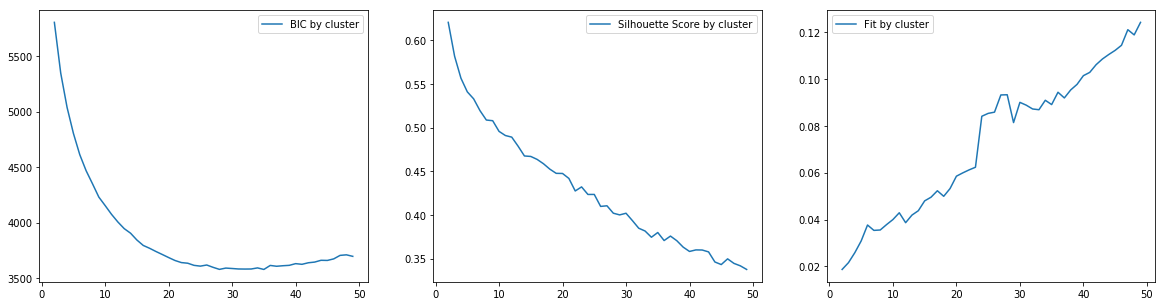

In [8]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(kmeans_models_df.index, kmeans_models_df.bic, label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_models_df.index, kmeans_models_df.sil_sc, label='Silhouette Score by cluster')
ax[1].legend()
ax[2].plot(kmeans_models_df.index, kmeans_models_df.fit_time, label='Fit by cluster')
ax[2].legend()

In [9]:
X_sc = (X - X.mean())/X.std()

In [10]:
ks = range(2, 50)

kmeans_sc_models = []

X = iris_df.drop('label', axis=1)

for k in tqdm(ks):
    kmeans_sc_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X_sc))
kmeans_sc_models_df = process_results(kmeans_sc_models, X_sc)

100%|██████████| 48/48 [00:03<00:00, 13.76it/s]


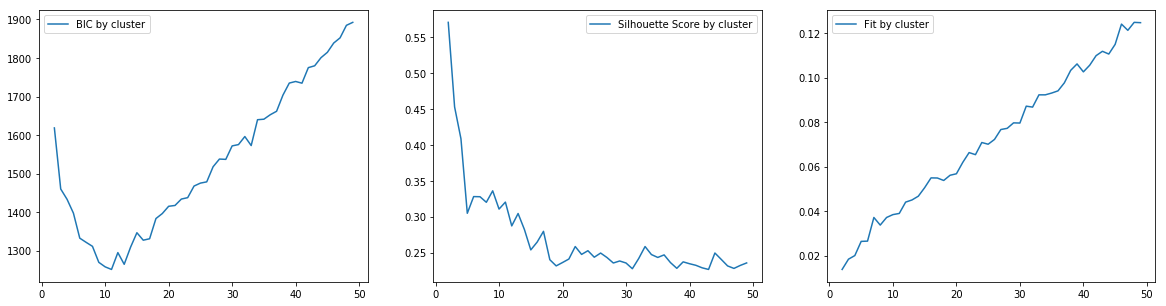

In [11]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.bic, label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.sil_sc, label='Silhouette Score by cluster')
ax[1].legend()
ax[2].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.fit_time, label='Fit by cluster')
ax[2].legend()

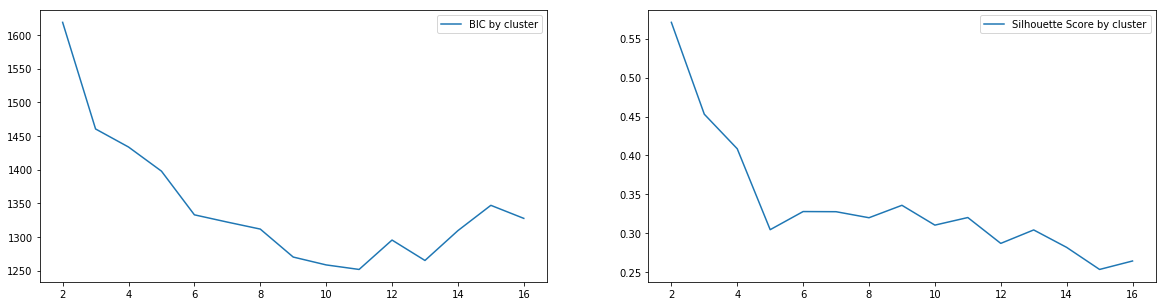

In [12]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.bic[:15], label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.sil_sc[:15], label='Silhouette Score by cluster')
ax[1].legend()

In [13]:
kmeans_sc_models_df.model.values[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans_2 = kmeans_sc_models_df.model.values[0]
kmeans_3 = kmeans_sc_models_df.model.values[1]
kmeans_4 = kmeans_sc_models_df.model.values[2]
kmeans_5 = kmeans_sc_models_df.model.values[3]

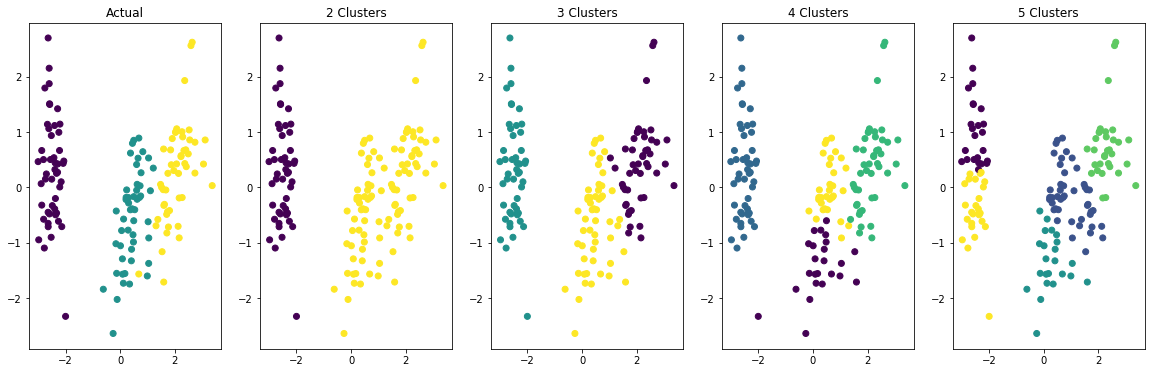

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

_, ax = plt.subplots(1,5, figsize=(20,6))
iris_2d = pca.fit_transform(X_sc)
ax[0].scatter(iris_2d[:, 0], iris_2d[:, 1], c=iris_df.label)
ax[0].set_title('Actual')
ax[1].scatter(iris_2d[:, 0], iris_2d[:, 1], c=kmeans_2.labels_)
ax[1].set_title('2 Clusters')
ax[2].scatter(iris_2d[:, 0], iris_2d[:, 1], c=kmeans_3.labels_)
ax[2].set_title('3 Clusters')
ax[3].scatter(iris_2d[:, 0], iris_2d[:, 1], c=kmeans_4.labels_)
ax[3].set_title('4 Clusters')
ax[4].scatter(iris_2d[:, 0], iris_2d[:, 1], c=kmeans_5.labels_)
ax[4].set_title('5 Clusters');

In [21]:
iris_df.label

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: label, dtype: int64